In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess the IMDb dataset
def load_and_preprocess_data(num_words=10000, maxlen=500):
    # Load the data
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

    # Pad sequences to ensure consistent input size
    x_train = pad_sequences(x_train, maxlen=maxlen)
    x_test = pad_sequences(x_test, maxlen=maxlen)

    return (x_train, y_train), (x_test, y_test)

In [3]:
# Define model parameters
num_words = 10000      # Number of unique tokens to consider
maxlen = 500          # Maximum length of input sequences
embedding_dim = 50    # Dimensionality of the embedding vectors
filters = 64          # Number of filters in the convolutional layer
kernel_size = 3       # Size of the convolutional kernel
pool_size = 2         # Size of the pooling window
epochs = 5            # Number of epochs for training
batch_size = 32       # Batch size

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data(num_words=num_words, maxlen=maxlen)

# Convert labels to categorical (for binary classification)
y_train = np.array(y_train)
y_test = np.array(y_test)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Create a sequential model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(maxlen, 1)))

# Add max pooling
model.add(MaxPooling1D(pool_size=pool_size))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape data to fit the model input requirements (adding a channel dimension)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.4974 - loss: 48.5319 - val_accuracy: 0.5064 - val_loss: 0.6930
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.4987 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6931
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6931
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5011 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6930
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4975 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6931


In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4927 - loss: 0.6933
Test Loss: 0.6932
Test Accuracy: 0.5000


In [6]:
# Predict sentiment
y_pred = (model.predict(x_test) > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


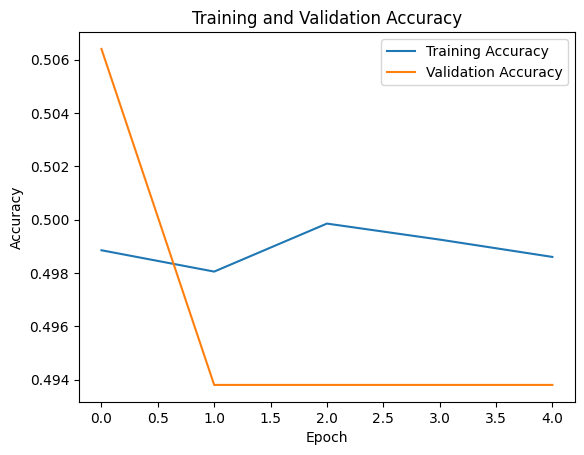

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [8]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     12500
    Positive       0.50      1.00      0.67     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
